# Match DMRs to featureCounts matrix

In [1]:
# import DMR dataframes from txt file 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

# 1 Import data 

In [2]:
# read in DMR data (unique gene ids) 
with open('/home/maggy/WholeGenomeBisulphiteSequencing/GO_analysis/1_prepare_data_for_GO_analysis/dmr_unique_geneids.json', 'r') as f:
    dmr_unique_geneids = json.load(f)
# concaternte all DMRs into one list 
dmr = [item for sublist in dmr_unique_geneids.values() for item in sublist]

In [3]:
# import fetaure cpounts (gene expression data)
expression = pd.read_csv('/home/maggy/WholeGenomeBisulphiteSequencing/RNAseq_pipeline/9_create_GeneCountsMatrix/gene_matrix_count.csv', sep=',', index_col=0)

# 2 Filter expression data to only contain DMR genes
Filter out low counts (below 50 as sum) 

In [4]:
# filter expression df for all the DMR genes
expressiondmr = expression[expression.index.isin(dmr)]

In [5]:
# filter the rows that have as a sum less than 50 counts
expressiondmr = expressiondmr[(expressiondmr.sum(axis=1) >= 50)]

In [6]:
# reorder the columns of the expression dataframes
# Specify the desired column order
column_order = ['N1', 'N2', 'N3', 'N7', 'A1', 'A2', 'A4', 'A7', 'R2', 'R3', 'R7', 'R8']
# Reorder the dataframe columns
expressiondmr = expressiondmr.reindex(columns=column_order)

In [7]:
expressiondmr.isna().any().any()

False

In [8]:
dmrna=[]
dmrnr=[]
dmrar=[]

# split the expressiondmr df into three df 
expressionNA = expressiondmr[expressiondmr.index.isin(dmr_unique_geneids['NvsA'])]
expressionNR = expressiondmr[expressiondmr.index.isin(dmr_unique_geneids['NvsR'])]
expressionAR = expressiondmr[expressiondmr.index.isin(dmr_unique_geneids['AvsR'])]

# 4 Plot DMR heatmap 

Text(0.5, 80.72222222222231, 'Samples')

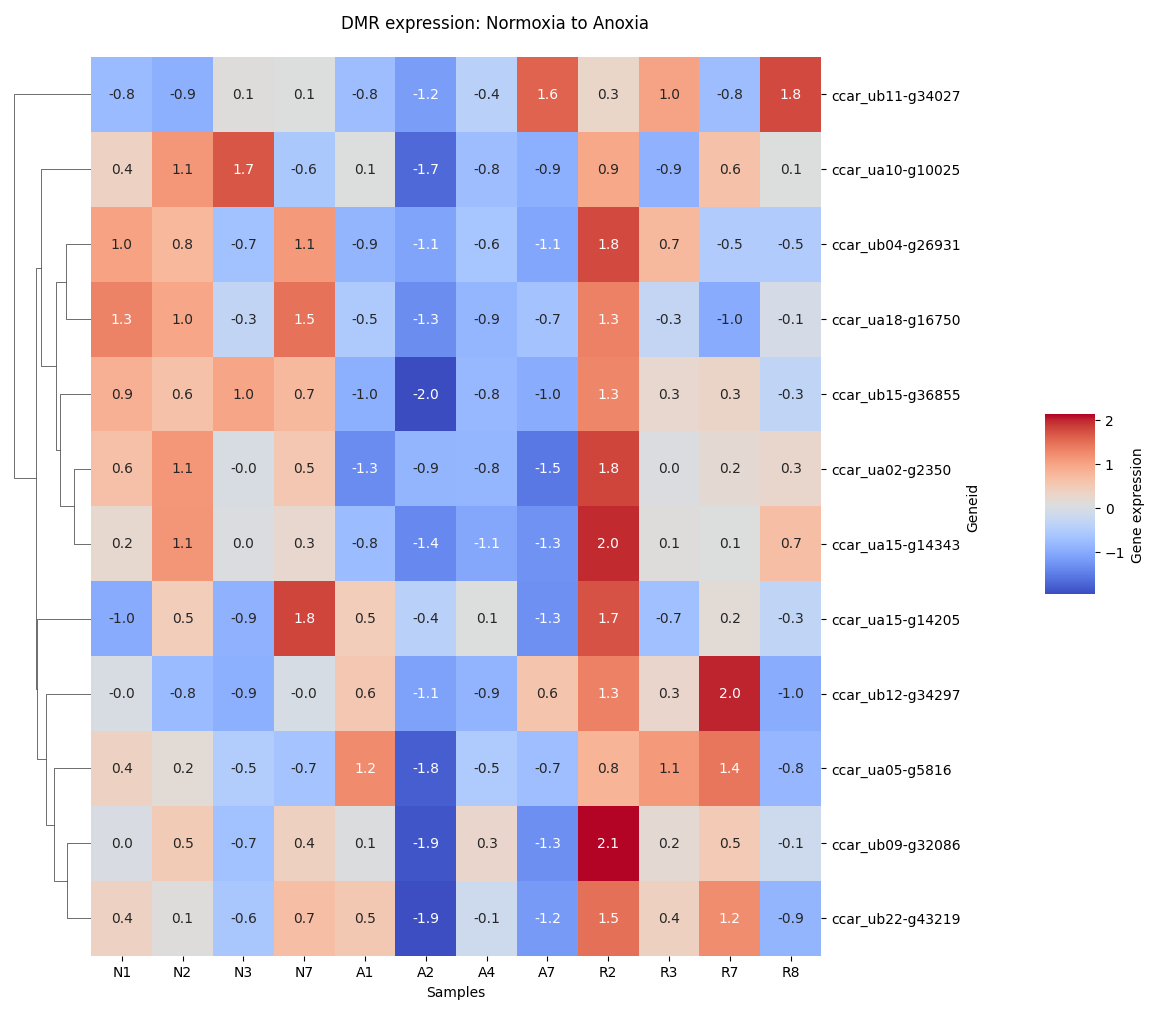

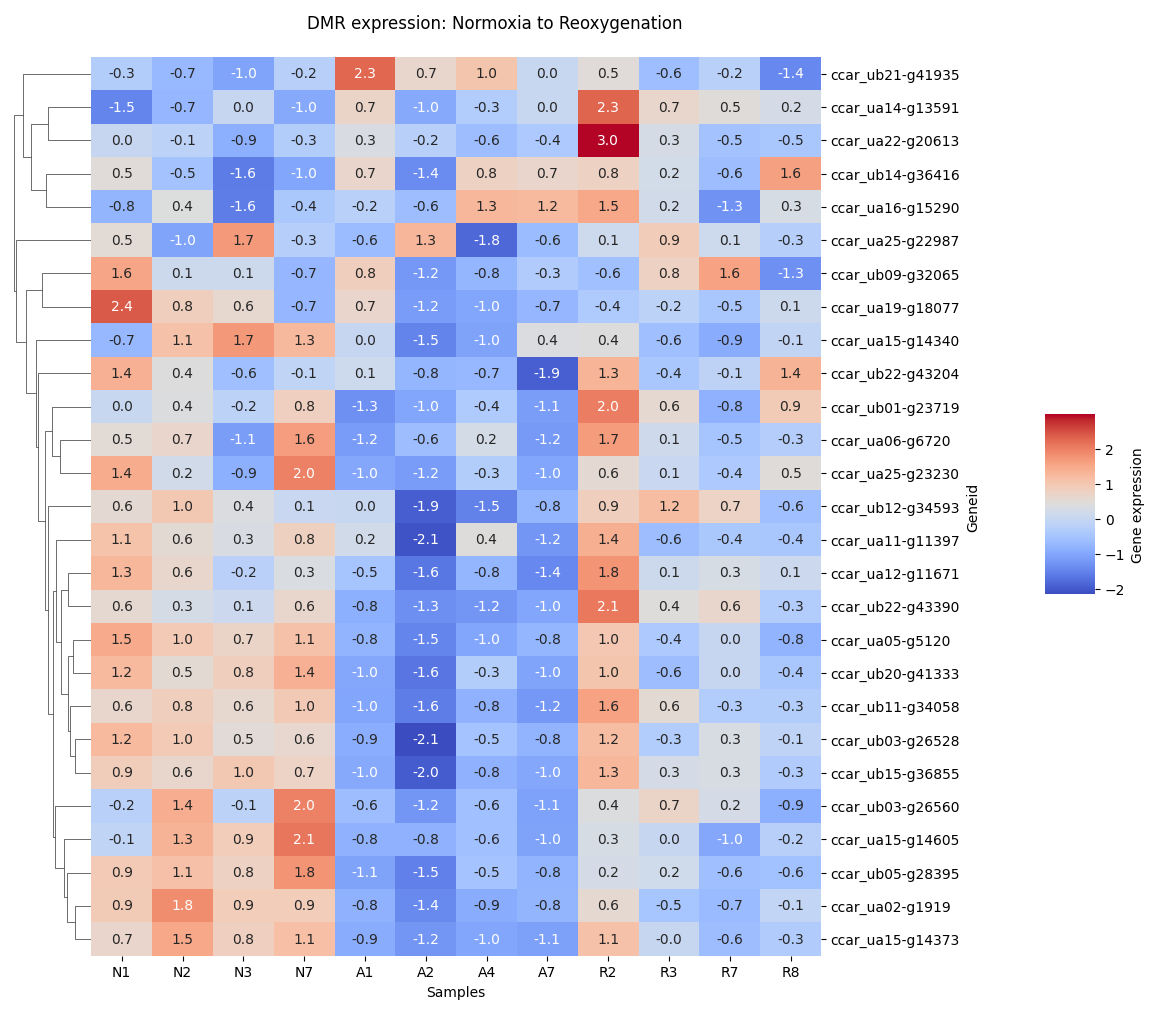

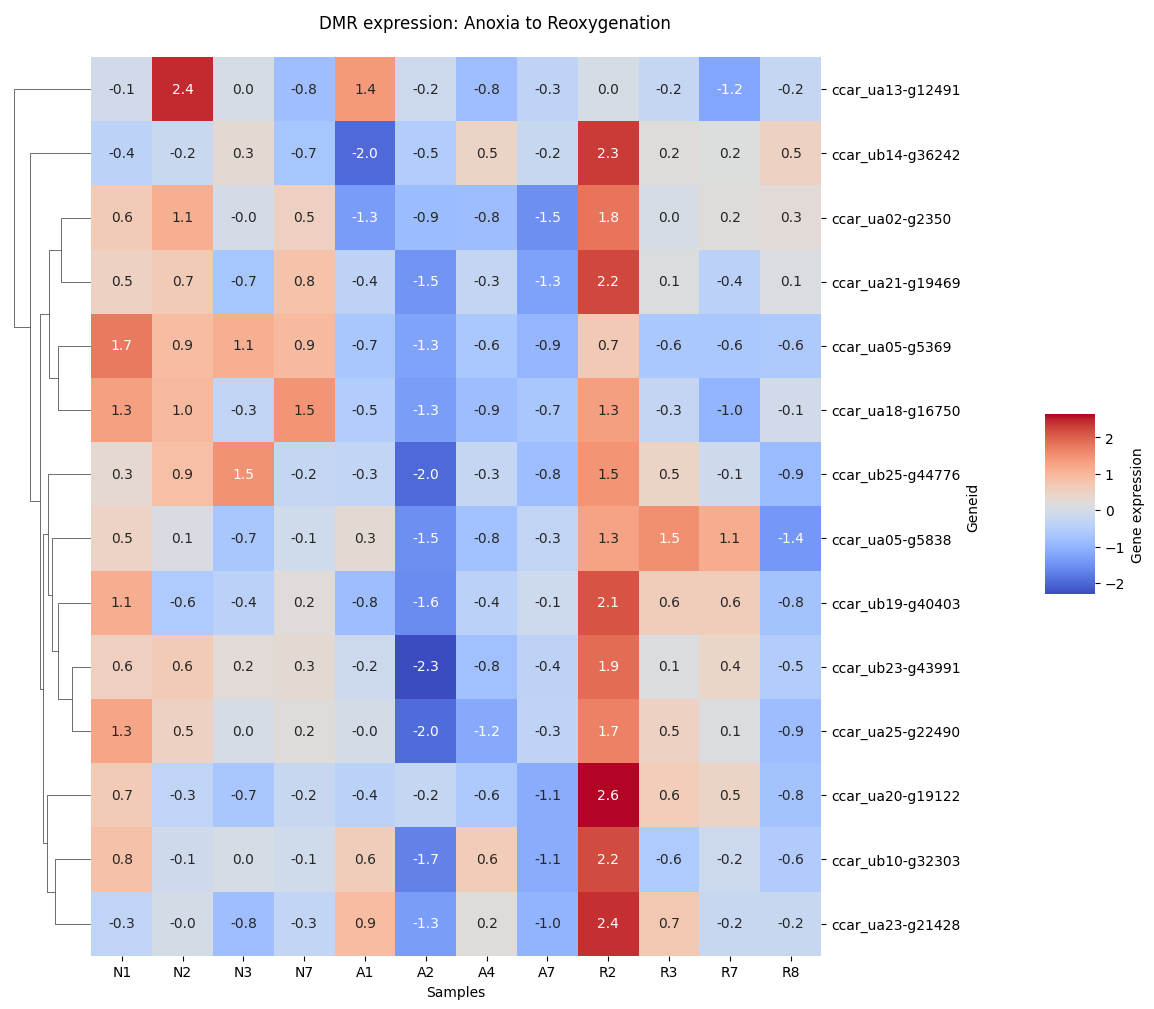

In [9]:
g = sns.clustermap(expressionNA, 
                cmap='coolwarm', figsize=(10, 10), cbar_pos=(1.05, 0.4, 0.05, 0.18), 
                cbar_kws={'label': 'Gene expression'}, xticklabels=True, yticklabels=True, 
                annot=True, fmt=".1f", col_cluster=False, z_score=0, row_cluster=True, dendrogram_ratio=(0.1, 0.05))
g.figure.suptitle('DMR expression: Normoxia to Anoxia')
g.ax_heatmap.set_xlabel('Samples')

g = sns.clustermap(expressionNR, 
                cmap='coolwarm', figsize=(10, 10), cbar_pos=(1.05, 0.4, 0.05, 0.18), 
                cbar_kws={'label': 'Gene expression'}, xticklabels=True, yticklabels=True, 
                annot=True, fmt=".1f", col_cluster=False, z_score=0, row_cluster=True, dendrogram_ratio=(0.1, 0.05))
g.figure.suptitle('DMR expression: Normoxia to Reoxygenation')
g.ax_heatmap.set_xlabel('Samples')

g = sns.clustermap(expressionAR, 
                cmap='coolwarm', figsize=(10, 10), cbar_pos=(1.05, 0.4, 0.05, 0.18), 
                cbar_kws={'label': 'Gene expression'}, xticklabels=True, yticklabels=True, 
                annot=True, fmt=".1f", col_cluster=False, z_score=0, row_cluster=True, dendrogram_ratio=(0.1, 0.05))
g.figure.suptitle('DMR expression: Anoxia to Reoxygenation')
g.ax_heatmap.set_xlabel('Samples')

# 5 Create heatmap for DEGs 

In [10]:
# Import DEG data 
na = pd.read_csv('/home/maggy/WholeGenomeBisulphiteSequencing/RNAseq_pipeline/11_identify_DEG/deg_na.csv')
nr = pd.read_csv('/home/maggy/WholeGenomeBisulphiteSequencing/RNAseq_pipeline/11_identify_DEG/deg_nr.csv')
ar = pd.read_csv('/home/maggy/WholeGenomeBisulphiteSequencing/RNAseq_pipeline/11_identify_DEG/deg_ar.csv')

# create a list of DEG
deg_na = na['Unnamed: 0'].to_list()
deg_nr = nr['Unnamed: 0'].to_list()
deg_ar = ar['Unnamed: 0'].to_list()

# concat lists
deg = deg_na + deg_nr + deg_ar

# filter featurecount data to only keep DEG
expressiondeg = expression[expression.index.isin(deg)]

# filter the rows that have as a sum less than 50 counts
expressiondeg = expressiondeg[(expressiondeg.sum(axis=1) >= 50)]

# reorder the columns of the expression dataframes
# Specify the desired column order
column_order = ['N1', 'N2', 'N3', 'N7', 'A1', 'A2', 'A4', 'A7', 'R2', 'R3', 'R7', 'R8']
# Reorder the dataframe columns
expressiondeg = expressiondeg.reindex(columns=column_order)

expressiondmr.isna().any().any()

# split the expressiondeg df into three df
expressiondegNA = expressiondeg[expressiondeg.index.isin(deg_na)]
expressiondegNR = expressiondeg[expressiondeg.index.isin(deg_nr)]
expressiondegAR = expressiondeg[expressiondeg.index.isin(deg_ar)]

# only keep the top 20 DEG
#expressiondegNA = expressiondegNA.head(20)
#expressiondegNR = expressiondegNR.head(20)
#expressiondegAR = expressiondegAR.head(20)

# 6 Plot DEG heatmap

Text(0.5, 300.7222222222225, 'Samples')

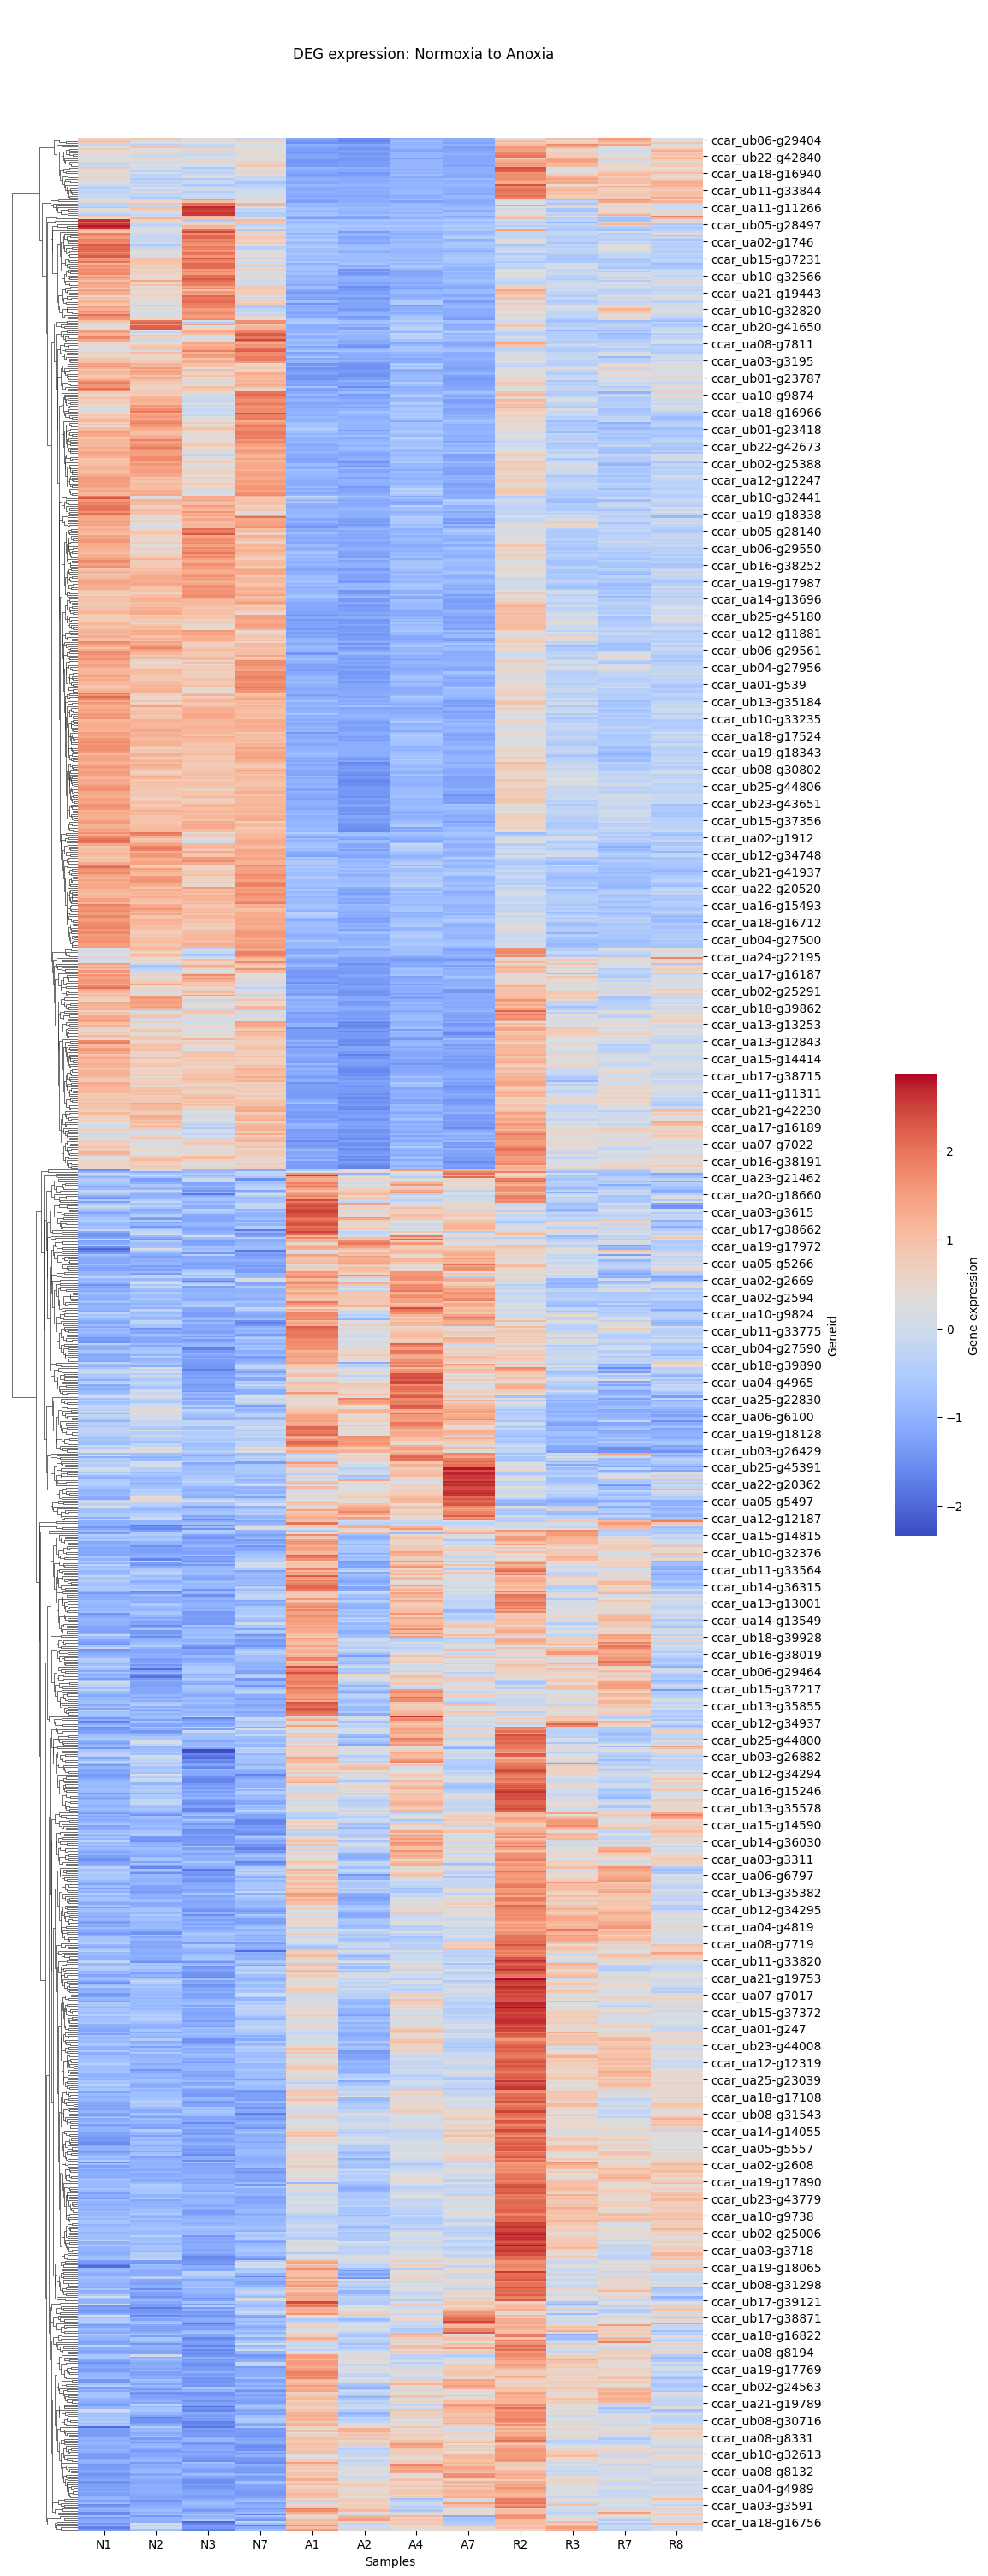

In [13]:
g = sns.clustermap(expressiondegNA, 
                cmap='coolwarm', figsize=(10, 30), cbar_pos=(1.05, 0.4, 0.05, 0.18), 
                cbar_kws={'label': 'Gene expression'}, xticklabels=True,  
                col_cluster=False, z_score=0, row_cluster=True, dendrogram_ratio=(0.1, 0.05))
g.figure.suptitle('DEG expression: Normoxia to Anoxia')
g.ax_heatmap.set_xlabel('Samples')

